In [1]:
from netCDF4 import Dataset
import numpy as np
#import matplotlib.dates as mdates
import matplotlib
import matplotlib.pyplot as plt
#import time
#import datetime
#import pandas as pd
#import calcFluxes #this is a personally created library that you must point to some how.  You can use
                    #the python os module to add to system path or put the location of this script in your .bashrc
#from matplotlib.ticker import MultipleLocator, FormatStrFormatter
#from matplotlib.patches import Rectangle

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (16, 10) # Large figures
dpi=200;

In [2]:
axis_font = {'fontname':'Arial', 'size':'18'}    
title_font = {'fontname':'Arial', 'size':'20', 'color':'black', 'weight':'normal'}
matplotlib.rc('xtick', labelsize=20)
matplotlib.rc('ytick', labelsize=20)

In [3]:
#This bit of code selects a few distinct colors that are also color blind safe 

hexcols = ['#332288', '#88CCEE', '#44AA99', '#117733', '#999933', '#DDCC77', 
           '#CC6677', '#882255', '#AA4499', '#661100', '#6699CC', '#AA4466',
           '#4477AA']

greysafecols = ['#809BC8', '#FF6666', '#FFCC66', '#64C204']

xarr = [[12], 
        [12, 6], 
        [12, 6, 5], 
        [12, 6, 5, 3], 
        [0, 1, 3, 5, 6], 
        [0, 1, 3, 5, 6, 8], 
        [0, 1, 2, 3, 5, 6, 8], 
        [0, 1, 2, 3, 4, 5, 6, 8], 
        [0, 1, 2, 3, 4, 5, 6, 7, 8], 
        [0, 1, 2, 3, 4, 5, 9, 6, 7, 8], 
        [0, 10, 1, 2, 3, 4, 5, 9, 6, 7, 8], 
        [0, 10, 1, 2, 3, 4, 5, 9, 6, 11, 7, 8]]

# get specified nr of distinct colours in HTML hex format.
# in: nr - number of colours [1..12]
# returns: list of distinct colours in HTML hex
def get_distinct(nr):

    #
    # check if nr is in correct range
    #
    
    if nr < 1 or nr > 12:
        print "wrong nr of distinct colours!"
        return

    #
    # get list of indices
    #
    
    lst = xarr[nr-1]
    
    #
    # generate colour list by stepping through indices and looking them up
    # in the colour table
    #

    i_col = 0
    col = [0] * nr
    for idx in lst:
        col[i_col] = hexcols[idx]
        i_col+=1
    return col

In [4]:
#Choose some line styles for plots

cvs1 = get_distinct(4)
colorlist = [cvs1[3],cvs1[3],cvs1[2],cvs1[2],cvs1[1],cvs1[1],cvs1[3],cvs1[3],cvs1[3],cvs1[0],cvs1[0]]
linestyles = ['solid','dashed','solid','dashed','solid','dashed','dotted','None','None','solid','dashed']
markerstyles = ['None','None','None','None','None','None','None','o','o','None','None']
linethick = ['2','2','2','2','2','2','2','2','2','4','4']
marksize = ['0','0','0','0','0','0','0','9','9','0','0']

In [5]:
#Reads converted POP data.  You should be able to point to your own data

filename = 'Convect1.nc'

data = Dataset(filename)
time = data.variables['time'][:]/86400.0 # convert from sec to days for plotting
blot = data.variables['blot'][:]
difvho = data.variables['difvho'][:,:]
difvmo = data.variables['difvho'][:,:]
zt = data.variables['zt'][:]
zw = data.variables['zw'][:]
uo = data.variables['uo'][:,:]
vo = data.variables['vo'][:,:]
thetao = data.variables['thetao'][:,:]
so = data.variables['so'][:,:]

finalday = 10.0
zbot = -100

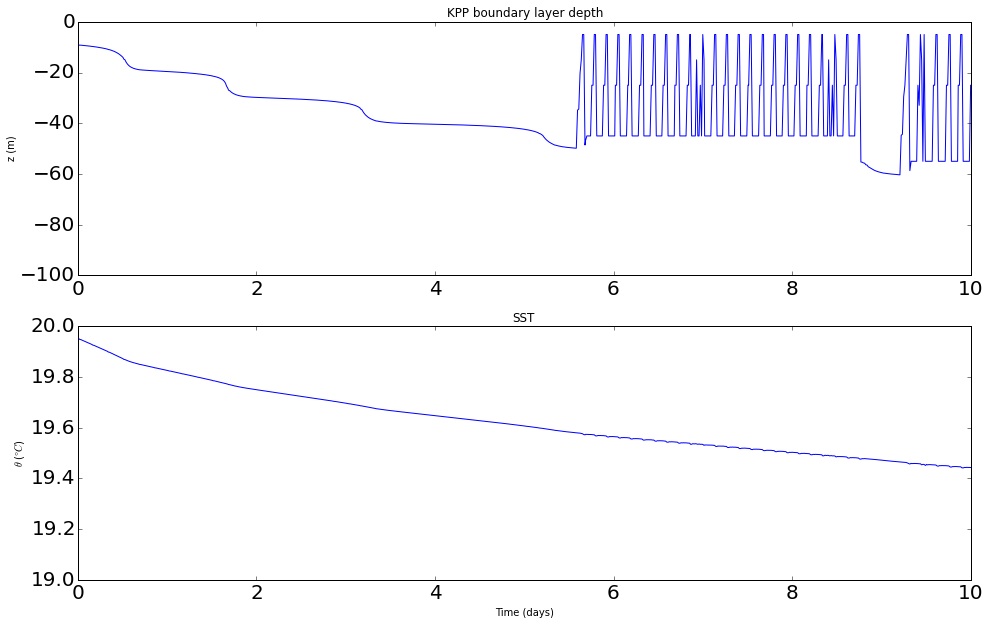

In [6]:
plt.subplot(2,1,1); plt.plot(time, -blot,'-')
plt.xlim(0,finalday); plt.ylim((-100,0))
plt.ylabel('z (m)'); plt.title('KPP boundary layer depth')
plt.subplot(2,1,2); plt.plot(time, thetao[:,0],'-')
plt.xlim(0,finalday); plt.ylim((19.0,20.0))
plt.xlabel('Time (days)'); plt.ylabel(r'$\theta$ (${\degree}C$)')
plt.title('SST');

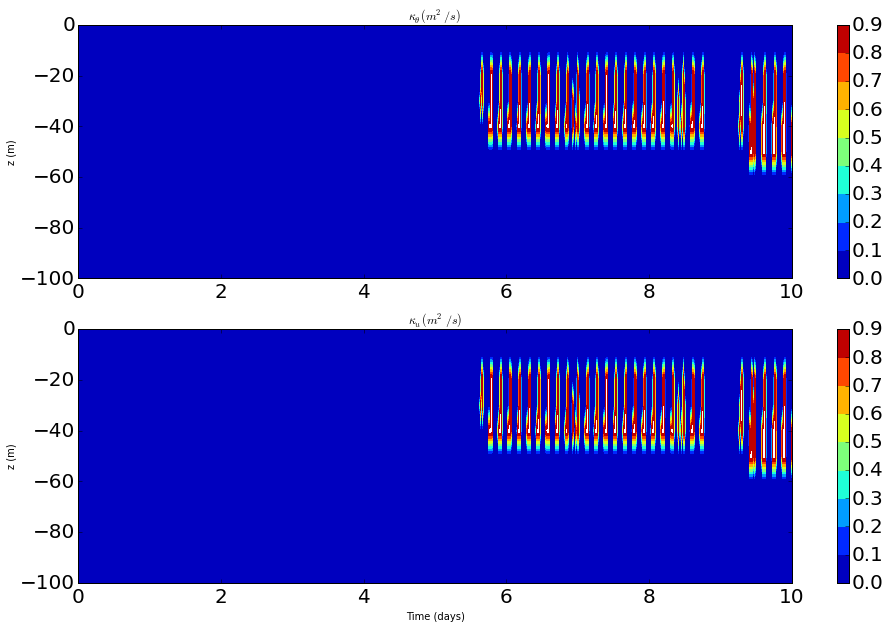

In [7]:
plt.subplot(2,1,1); plt.contourf(time, -zw[0,:], difvho.T, levels=np.arange(0,1.0,.1)); plt.colorbar()
plt.xlim(0,finalday); plt.ylim((zbot,0)); plt.ylabel('z (m)'); plt.title(r'$\kappa_\theta (m^2/s)$')
plt.subplot(2,1,2); plt.contourf(time, -zw[0,:], difvmo.T, levels=np.arange(0,1.0,.1)); plt.colorbar()
plt.xlim(0,finalday); plt.ylim((zbot,0)); plt.ylabel('z (m)'); plt.title(r'$\kappa_u (m^2/s)$')
plt.xlabel('Time (days)');

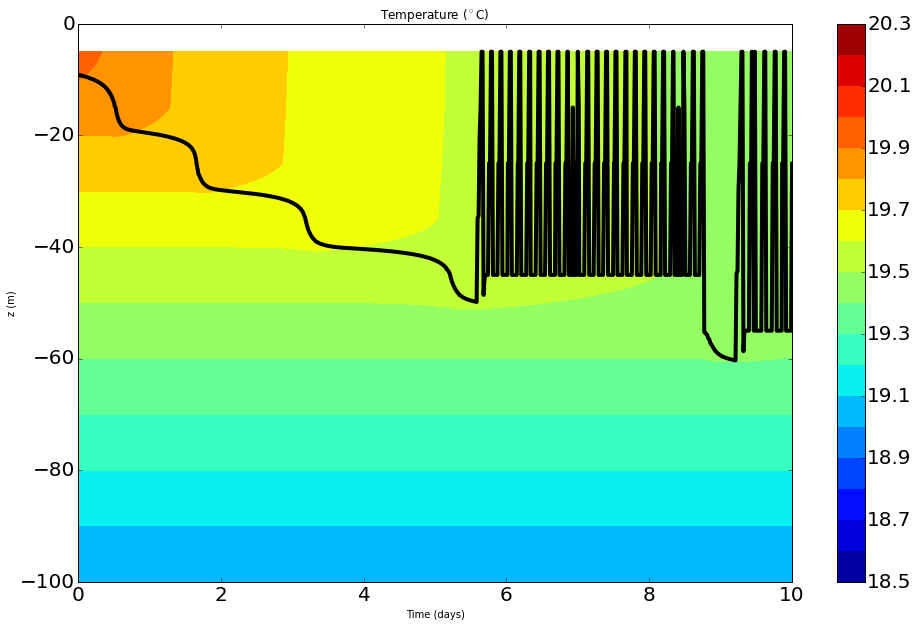

In [8]:
#Temperature Contour Plots

plt.contourf(time, -zt[0,:], thetao.T, levels=np.arange(18.5,20.4,0.1))
plt.ylim((zbot,0)); plt.ylabel('z (m)')
plt.xlim(0,finalday); plt.xlabel('Time (days)')
plt.plot(time, -blot,'k',linewidth=4)
plt.title(r'Temperature ($^\circ$C)')
plt.colorbar();

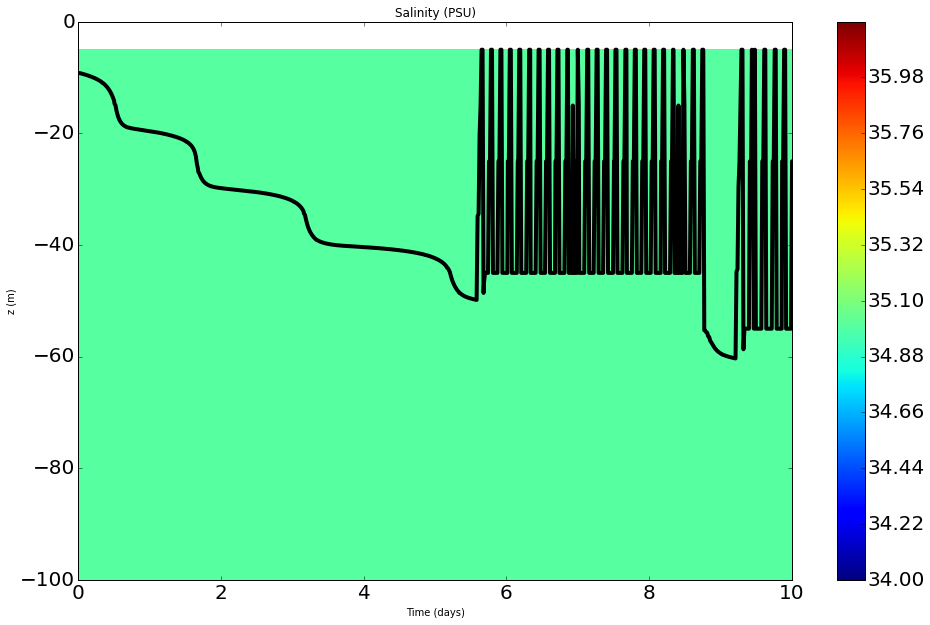

In [9]:
#Contour plot of salinity

plt.contourf(time,-zt[0,:],so.T,levels=np.arange(34,36.2,0.00005))
plt.ylim((zbot,0)); plt.ylabel('z (m)')
plt.xlim(0,finalday); plt.xlabel('Time (days)');
plt.plot(time, -blot,'k',linewidth=4)
plt.title('Salinity (PSU)')
plt.colorbar();

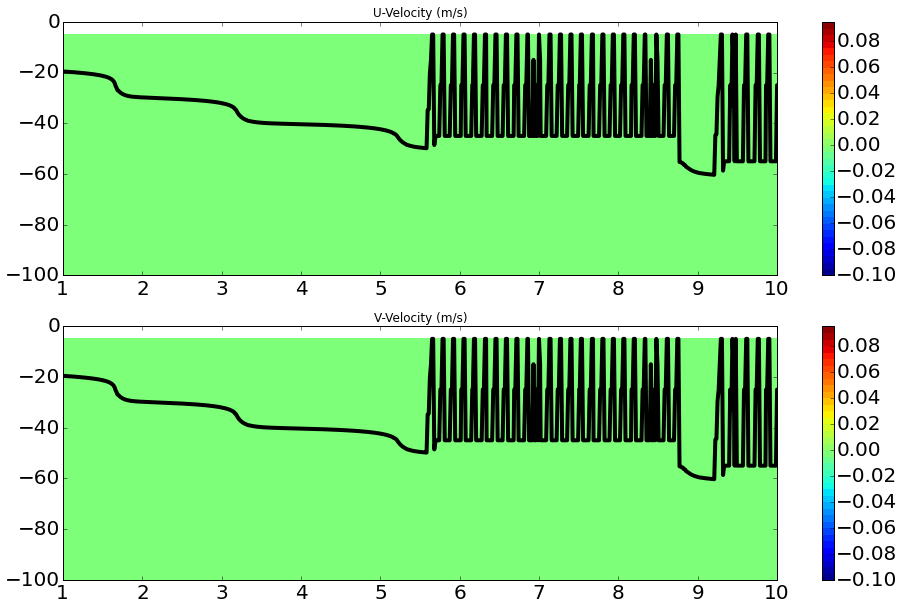

In [10]:
#U,V contours

fig, (ax1,ax2)=plt.subplots(2,1,sharex=False,sharey='row')
pc=ax1.contourf(time,-zt[0,:],uo.T,levels=np.arange(-0.1,0.1,0.005))
ax1.set_ylim(zbot, 0)
ax1.set_xlim(1,finalday)
ax1.set_title('U-Velocity (m/s)')
ax1.plot(time, -blot,'k',linewidth=4)
fig.colorbar(pc,ax=ax1);

pc=ax2.contourf(time,-zt[0,:],vo.T,levels=np.arange(-0.1,0.1,0.005))
ax2.set_ylim(zbot, 0)
ax2.set_xlim(1,finalday)
ax2.set_title('V-Velocity (m/s)')
ax2.plot(time, -blot,'k',linewidth=4)
fig.colorbar(pc,ax=ax2);